In [20]:
import pandas as pd
import numpy as np

subpath = "naive_periodic_experiment_k_fold/2025-02-20T23:11:42"
data = pd.read_csv(f'{subpath}/minimal_with_univariate.csv', index_col=False)
data

reference_split = pd.read_csv(f'naive_periodic_experiment/2025-01-06T19:07:27/minimal_with_univariate.csv', index_col=False)
reference_tptt = pd.read_csv(f'naive_periodic_experiment_tptt/2025-01-26T20:09:01/minimal_with_univariate.csv', index_col=False)



In [21]:
data[data['período'] == 256].sort_values(by=['carga', 'apps', 'método'], ascending=False)

,período,carga,apps,feature,método,nmae
48,256,PeriodicLoad,SingleApp,DispFrames,RT,0.104208
49,256,PeriodicLoad,SingleApp,DispFrames,RF,0.092541
16,256,PeriodicLoad,BothApps,DispFrames,RT,0.177952
17,256,PeriodicLoad,BothApps,DispFrames,RF,0.141254
32,256,FlashcrowdLoad,SingleApp,DispFrames,RT,0.076416
33,256,FlashcrowdLoad,SingleApp,DispFrames,RF,0.079943
0,256,FlashcrowdLoad,BothApps,DispFrames,RT,0.101273
1,256,FlashcrowdLoad,BothApps,DispFrames,RF,0.098724


In [22]:
import scipy.stats as st

group = data.groupby(["período"])['nmae'].agg(['mean', 'std', 'count']).reset_index()
# Compute standard error
group['se'] = group['std'] / np.sqrt(group['count'])

# Compute 95% confidence interval using t-distribution
group['ci'] = group.apply(lambda row: st.t.ppf(0.975, df=row['count']-1) * row['se'], axis=1)

# Print results as "mean ± ci"
for _, row in group.iterrows():
  print(f"{row['período']}: {row['mean']:.3f} ± {row['ci']:.3f}")


2.0: 0.110 ± 0.014
4.0: 0.115 ± 0.014
8.0: 0.118 ± 0.018
16.0: 0.121 ± 0.019
32.0: 0.118 ± 0.019
64.0: 0.118 ± 0.027
128.0: 0.112 ± 0.015
256.0: 0.109 ± 0.029


In [23]:
group = data.groupby(["período"])['nmae'].agg(['mean', 'std']).reset_index()

In [24]:
group['std'] = round(100*group['std'], 0)
group['mean'] = round(100*group['mean'], 0)

In [25]:
group

,período,mean,std
0,2,11.0,2.0
1,4,12.0,2.0
2,8,12.0,2.0
3,16,12.0,2.0
4,32,12.0,2.0
5,64,12.0,3.0
6,128,11.0,2.0
7,256,11.0,3.0


In [26]:
new_data = pd.DataFrame({'período': [1], 'mean': [12], 'std': [2]})

total_table = pd.concat([group, new_data], ignore_index=True)


In [27]:
total_table.set_index('período', inplace=True)

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

y_limits = (0.05, 0.26)

plt.figure(figsize=(14, 8))

data['Experimento'] = 'Sem Seleção de Características'
naive_without_fs['Experimento'] = 'Seleção de Características'
#reference_tptt['Experimento'] = 'TPTT'

data_combined = pd.concat([data, naive_without_fs, ], ignore_index=True)

sns.boxplot(x='período', y='nmae', data=data_combined, hue='Experimento')



plt.xlabel("Período", fontsize=12)
plt.ylabel("NMAE", fontsize=12)
plt.title("NMAE", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(y_limits)
plt.show()

NameError: name 'naive_without_fs' is not defined

<Figure size 1400x800 with 0 Axes>

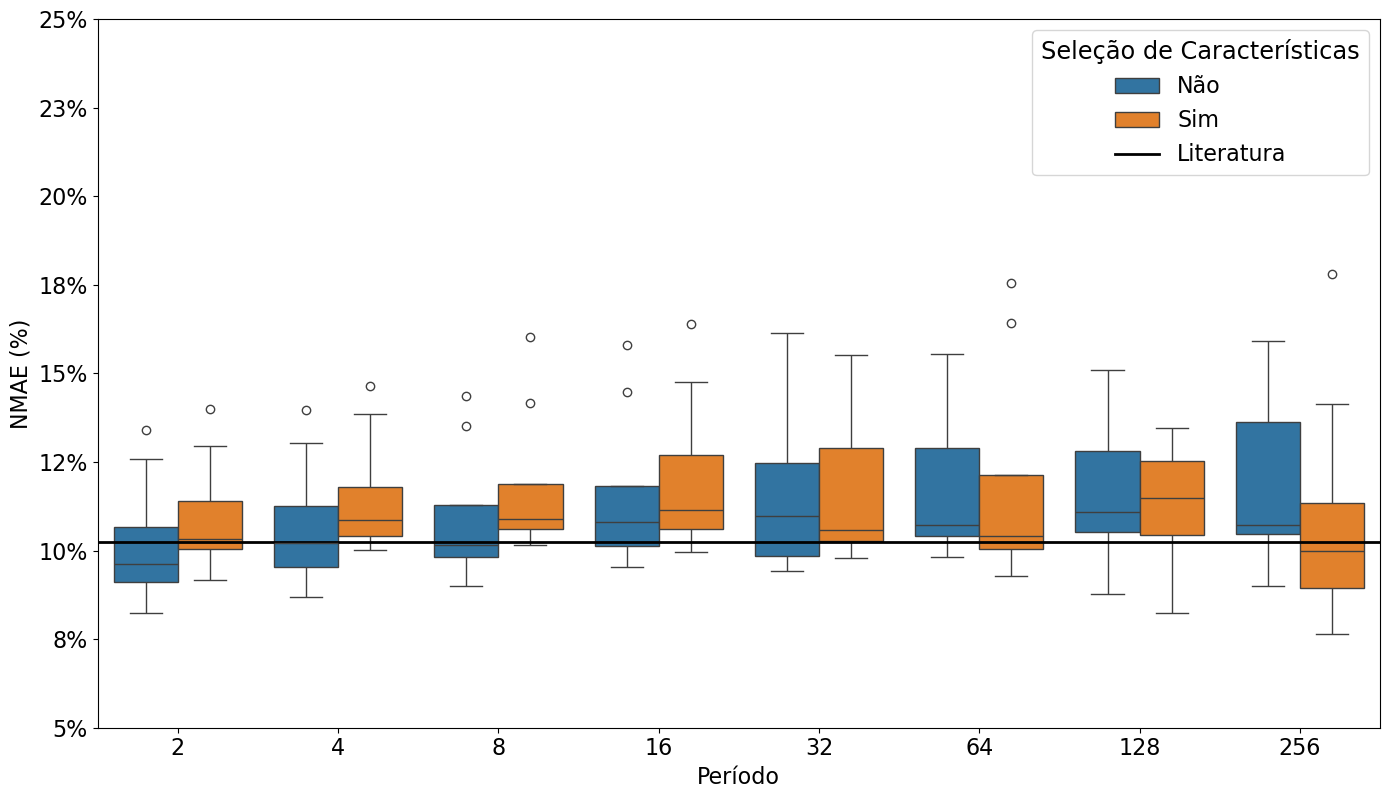

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


y_limits = (0.05, 0.25)

plt.figure(figsize=(14, 8))

data['Seleção de Características'] = 'Sim'
naive_without_fs = pd.read_csv(f'naive_periodic_experiment_k_fold/2025-02-20T23:11:42/total_X.csv', index_col=False)
naive_without_fs['Seleção de Características'] = 'Não'


data_combined = pd.concat([naive_without_fs, data, ], ignore_index=True)

sns.boxplot(x='período', y='nmae', data=data_combined, hue='Seleção de Características')


plt.xlabel("Período", fontsize=16)
plt.ylabel("NMAE (%)", fontsize=16)

plt.axhline(y=0.1025, color='black', linestyle='-', linewidth=2, label='Literatura')
plt.axhline(y=0.105, color='black', linestyle='-.', linewidth=2, label='Literatura com Seleção de Características')

#plt.title("NMAE", fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.rcParams['legend.title_fontsize'] = 'xx-large'
plt.legend(title="Seleção de Características", prop={'size': 16})
plt.tight_layout()
plt.ylim(y_limits)
plt.show()

In [7]:
group_by_method = data.groupby(["período", "método"])['nmae'].agg(['mean', 'std']).reset_index()

In [8]:
group_by_method['std'] = round(100*group_by_method['std'], 0)
group_by_method['mean'] = round(100*group_by_method['mean'], 0)

In [9]:
group_by_method

,período,método,mean,std
0,2,RF,12.0,1.0
1,2,RT,12.0,1.0
2,4,RF,12.0,2.0
3,4,RT,12.0,2.0
4,8,RF,12.0,2.0
5,8,RT,12.0,2.0
6,16,RF,13.0,2.0
7,16,RT,13.0,2.0
8,32,RF,14.0,3.0
9,32,RT,14.0,3.0


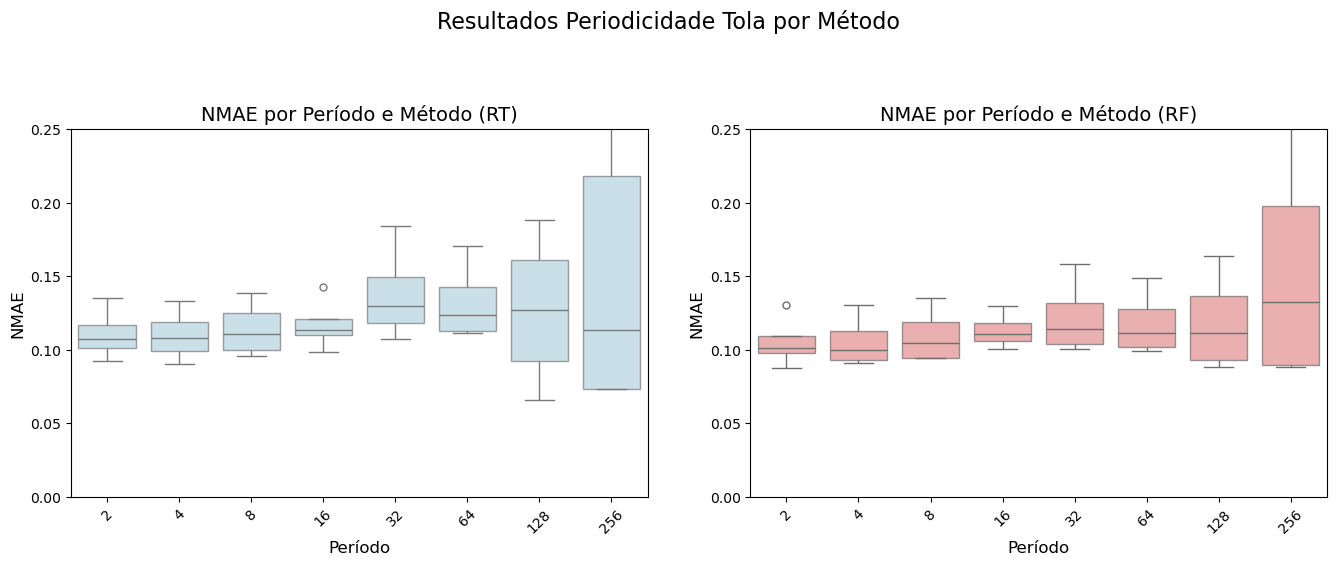

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.25)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RT'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Método (RT)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RF'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Método (RF)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

fig.suptitle("Resultados Periodicidade Tola por Método", fontsize=16)

plt.tight_layout(pad=3.0)

plt.show()


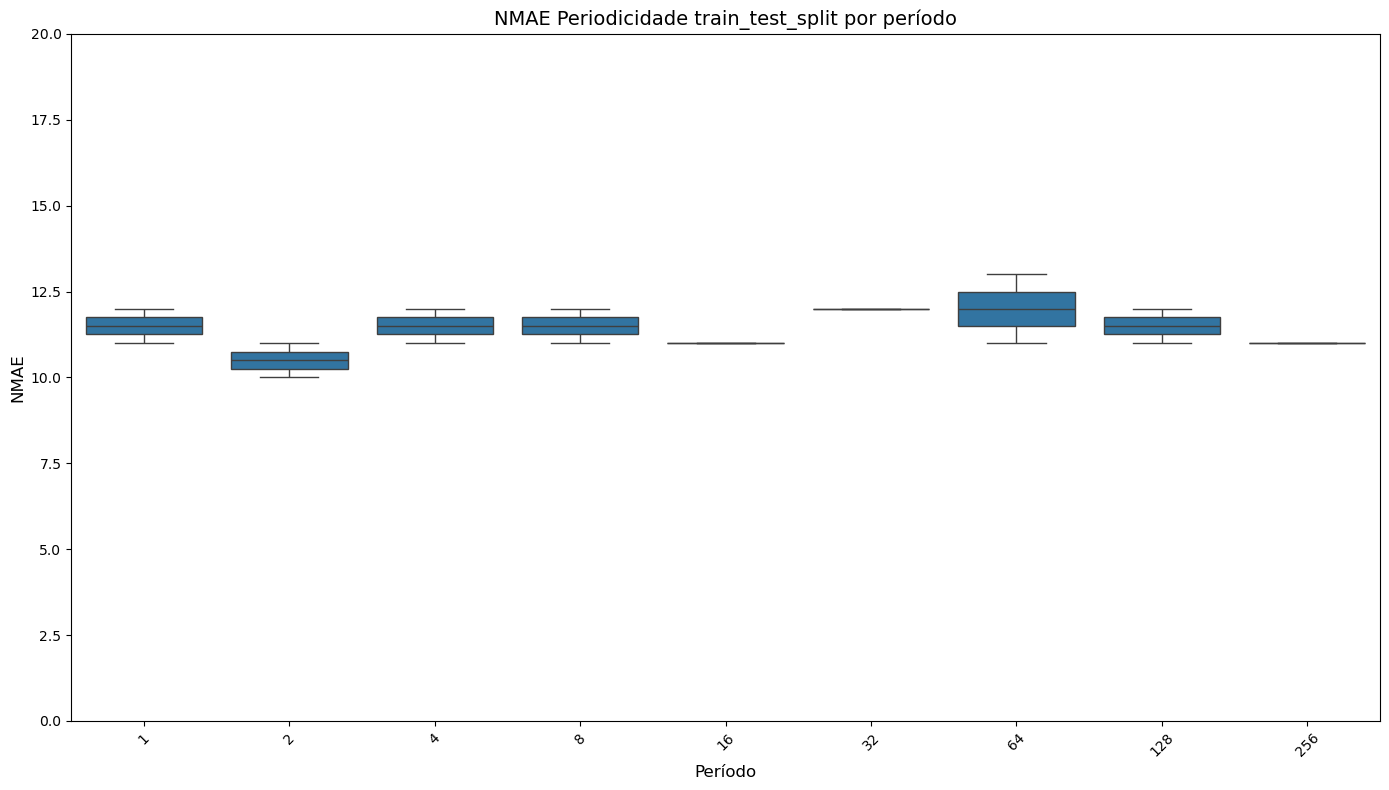

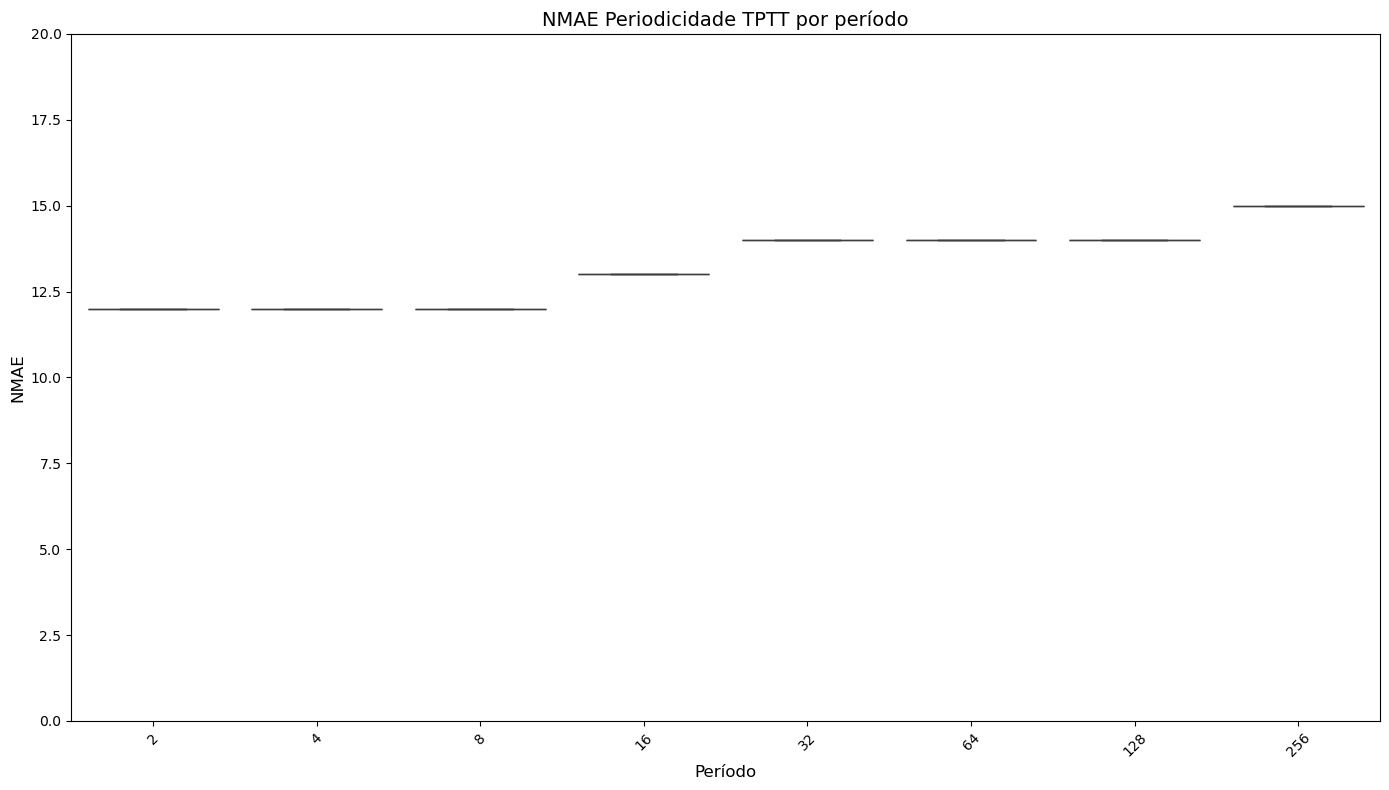

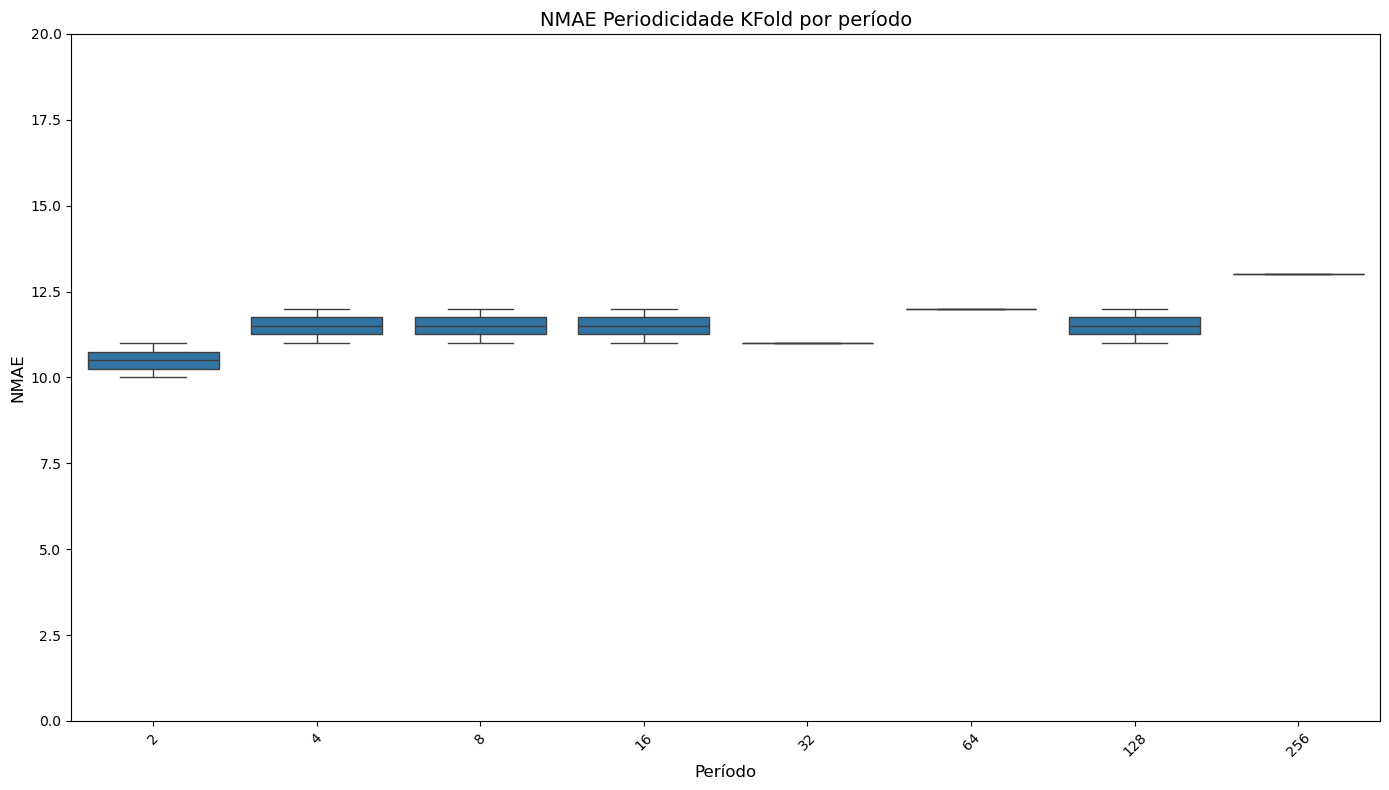